In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
labels = pd.read_csv('./dataset/new/labels.csv')
labels

,Position,Aggregated,1,2,3,4,5,6,7
0,0,0,0,0,0,0.0,0.0,0.0,NaN
1,1,0,0,0,0,0.0,0.0,0.0,NaN
2,2,0,0,0,0,0.0,0.0,0.0,NaN
3,3,0,0,0,0,0.0,0.0,0.0,NaN
4,4,0,0,0,0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
119995,95,0,0,0,0,0.0,0.0,0.0,0.0
119996,96,0,0,0,0,0.0,0.0,0.0,0.0
119997,97,0,0,0,0,0.0,0.0,0.0,0.0
119998,98,0,0,0,0,0.0,0.0,0.0,0.0


In [81]:
def calculate_classified(labels: pd.DataFrame, precision_digits: int = 2):
    classified = []
    for index, r in labels[['1', '2', '3', '4', '5', '6', '7']].iterrows():
        #get rid on Nan to have really % of people classified, not the count of people divided by 7
        # not the same as number of annotators differs for each sample between 3 and 6
        row = r.dropna().to_numpy().tolist()
        # transform rows with 0's and some class label into 0's and 1's where it is labeled
        # is ok while we are guaranteed that only one of spicies is classified at each sample
    
        row = [1 if x != 0 else 0 for x in row]
    
        true_labeled = row.count(1)
        all_labeled = len(row)
    
        classified.append((true_labeled/all_labeled).__round__(precision_digits))
    return classified

In [83]:
labels['classified%'] = calculate_classified(labels)

<AxesSubplot:xlabel='classified%', ylabel='Probability'>

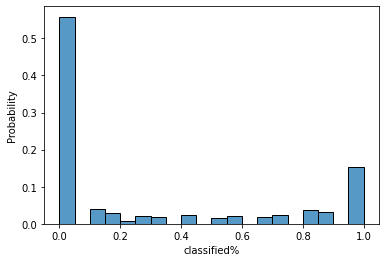

In [84]:
sns.histplot(data=labels, x="classified%", stat='probability', element="bars", bins=20)

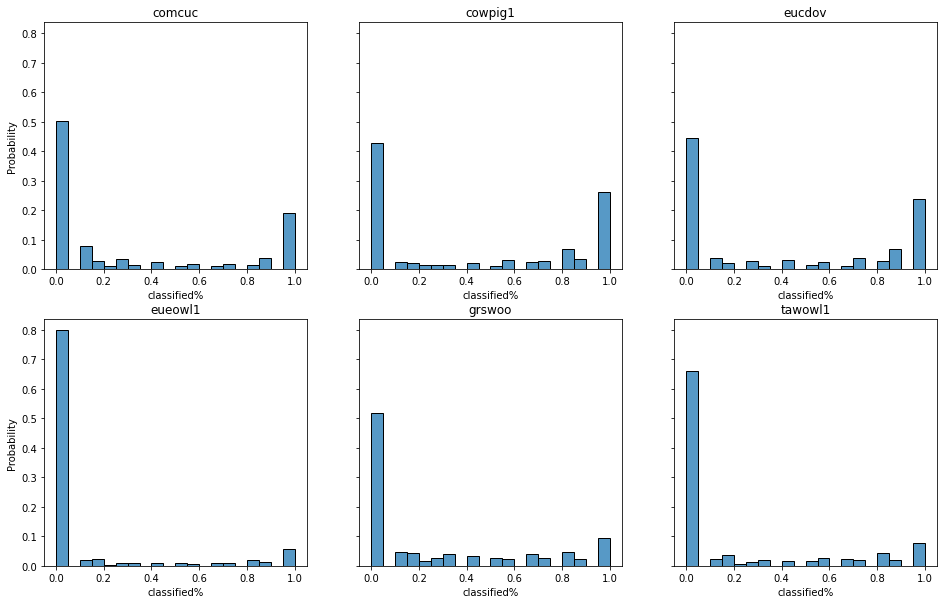

In [91]:
folders = ["comcuc", "cowpig1", "eucdov", "eueowl1", "grswoo", "tawowl1"]
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(16, 10))
for i, folder in enumerate(folders):
    labels_folder = pd.read_csv('./dataset/new/' + folder + '_labels.csv')
    labels_folder['classified%'] = calculate_classified(labels_folder)
    sns.histplot(ax=axes[int(i/3), i%3], data=labels_folder, x="classified%", stat='probability', element="bars", bins=20).set(title=folder)

In [92]:
#plt.scatter(labels['Aggregated'], labels['classified%'])

In [93]:
print(len(labels.loc[(labels['Aggregated'] != 0) & (labels['classified%'] > 0.79)])/len(labels.loc[(labels['Aggregated'] != 0)]))

# cut at 0.65 and up is labeled truly
# leads to ±27 % of 1's, rest is classified as others

0.7764274579989608
